In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [73]:
def f(x, y):
    """
    Функция f(x, y) = sin(x) * cos(y) + x * y.

    :param x: Значение x (float).
    :param y: Значение y (float).
    :return: Результат функции (float).
    """
    return np.sin(x) * np.cos(y) + x * y

In [74]:
def grad_f(x, y):
    """
    Градиент функции f(x, y) по отношению к x и y.

    :param x: Значение x (float).
    :param y: Значение y (float).
    :return: Градиент функции (np.array[2], где первый элемент - градиент по x, второй - градиент по y).
    """
    grad_x = np.cos(x) * np.cos(y) + y
    grad_y = -np.sin(x) * np.sin(y) + x
    return np.array([grad_x, grad_y])

In [75]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None, y0=None):
    """
    Функция, которая реализует градиентный спуск в минимум для функции f(x, y).

    :param f: Функция двух переменных f(x, y).
    :param grad_f: Градиент функции f(x, y) (np.array[2]).
    :param lr: Learning rate алгоритма.
    :param num_iter: Количество итераций градиентного спуска.
    :param x0: Начальное значение x (float).
    :param y0: Начальное значение y (float).
    :return: Матрица размерности (num_iter, 3), где каждая строка содержит (x, y, f(x, y)).
    """
    if x0 is None:
        x0 = np.random.random()
    if y0 is None:
        y0 = np.random.random()

    history = []

    curr_x, curr_y = x0, y0
    for iter_num in range(num_iter):
        entry = np.array([curr_x, curr_y, f(curr_x, curr_y)])
        history.append(entry)

        gradient = grad_f(curr_x, curr_y)
        curr_x -= lr * gradient[0]
        curr_y -= lr * gradient[1]

    return np.vstack(history)

In [76]:
# Параметры градиентного спуска
lr = 0.1
num_iter = 20

In [77]:
# Выполнение градиентного спуска
steps = grad_descent_2d(f, grad_f, lr=lr, num_iter=num_iter)

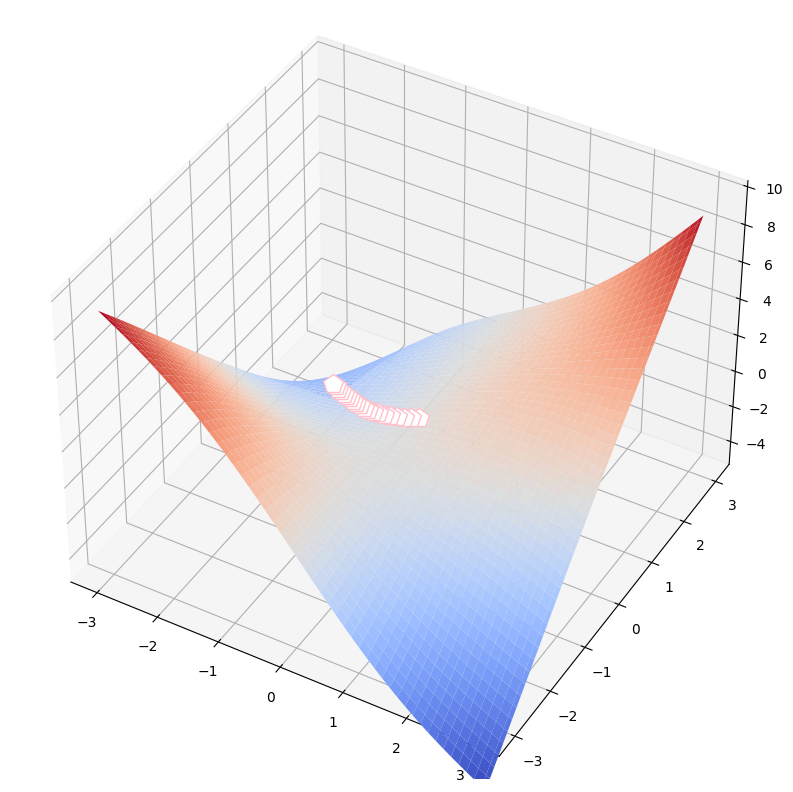

In [78]:
# Создание сетки для графика
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = f(X, Y)

# Создание 3D графика
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, zorder=2)
ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='p', markersize=15, zorder=3,
        markerfacecolor='w', lw=3, c='pink')

ax.set_zlim(-5, 10)
ax.view_init(elev=40)

# Отображение графика и графика значений функции на каждом шаге
plt.show()


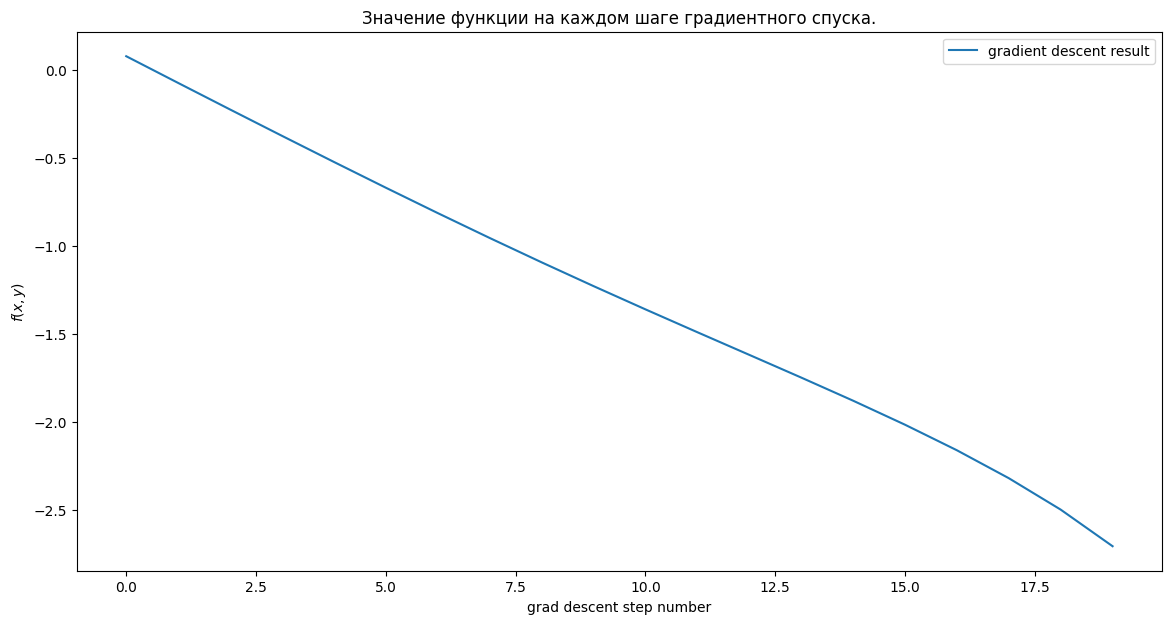

In [79]:
# График значений функции на каждом шаге градиентного спуска
plt.figure(figsize=(14, 7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x, y)$')
plt.title('Значение функции на каждом шаге градиентного спуска.')

f_values = steps[:, 2]
plt.plot(f_values, label='gradient descent result')
plt.legend()

# Отображение графика значений функции на каждом шаге
plt.show()
